In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import xgboost
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
import pandas as pd
plt.style.use('fivethirtyeight')
%matplotlib inline


In [0]:
import pandas as pd
from datetime import datetime
pd.DataFrame(pd.date_range(start="2020-05-01",end="2020-05-10"))

,0
0,2020-05-01
1,2020-05-02
2,2020-05-03
3,2020-05-04
4,2020-05-05
5,2020-05-06
6,2020-05-07
7,2020-05-08
8,2020-05-09
9,2020-05-10


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


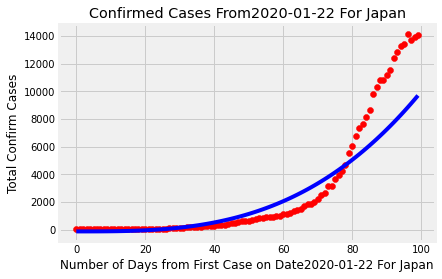

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


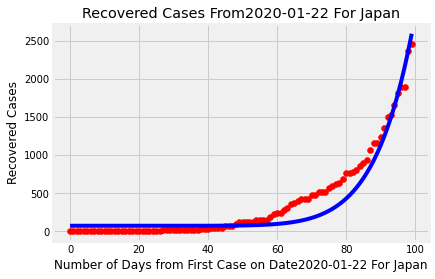

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


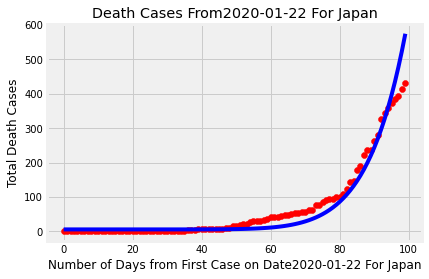

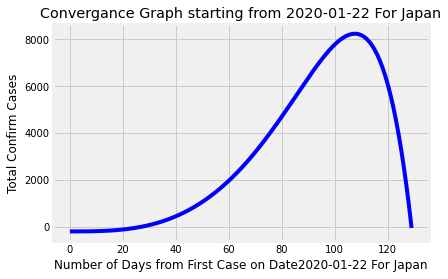

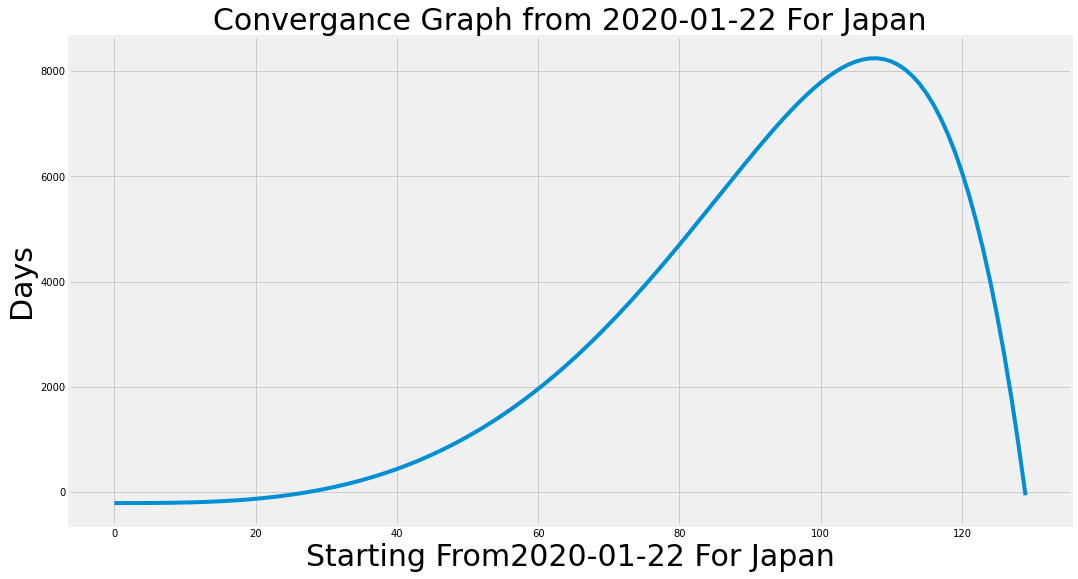

,Date,Predicted Number of Confirmed Cases
0,2020-05-01,9987.986561
1,2020-05-02,10294.826028
2,2020-05-03,10607.802082
3,2020-05-04,10926.975481
4,2020-05-05,11252.406983
5,2020-05-06,11584.157347
6,2020-05-07,11922.287331
7,2020-05-08,12266.857693
8,2020-05-09,12617.929191
9,2020-05-10,12975.562585


In [0]:
cdata = pd.read_csv("countries.csv")
japan = cdata[cdata['Country'] == 'Japan']



# coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])

# input = 'Delhi'

# newdata1 = coviddata[coviddata['State/UnionTerritory'] == input]

input = 'Japan'
newdata1 = japan
recover = newdata1['Recovered']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']
date = np.array(newdata1['Date'])[0]+" For "+input
start_date = 'Number of Days from First Case on Date'+date

svr_rbf3 = SVR(kernel='poly', degree=3)

lw = 2

model_color = ['m', 'c', 'g']

y = pd.DataFrame(confirmed)

X = pd.DataFrame(range(len(confirmed)))


confirmed_model = svr_rbf3.fit(X, y)

plt.scatter(X, y, color = 'red')

t = pd.DataFrame(range(len(X)))

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, confirmed_model.predict(t), color = 'blue')
plt.title('Confirmed Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Total Confirm Cases')
plt.show()



n = len(X)
t10 = pd.DataFrame({"Date" : range(n, n + 10)})

import pandas as pd
from datetime import datetime
t1 = pd.DataFrame({"Date" : pd.date_range(start="2020-05-01",end="2020-05-10")})

t1['Predicted Number of Confirmed Cases'] = pd.DataFrame(confirmed_model.predict(t10))



X["data"] = confirmed_model.predict(X)

y = pd.DataFrame(recover)
svr_rbf3 = SVR(kernel='poly', degree=3)
recover_model = svr_rbf3.fit(X, y)

data = recover_model.predict(X)



t = pd.DataFrame(range(len(X)))

plt.scatter(t, y, color = 'red')

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, recover_model.predict(X), color = 'blue')
plt.title('Recovered Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Recovered Cases')
plt.show()









# coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])
# coviddata.tail(10)

# newdata1 = coviddata[coviddata['State/UnionTerritory'] == 'Delhi']
newdata1 = japan
recover = newdata1['Recovered']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']
date = np.array(newdata1['Date'])[0]+" For "+input
start_date = 'Number of Days from First Case on Date'+date

svr_rbf3 = SVR(kernel='poly', degree=3)

lw = 2

model_color = ['m', 'c', 'g']
y = pd.DataFrame(confirmed)

X1 = pd.DataFrame(range(len(confirmed)))


confirmed_model = svr_rbf3.fit(X1, y)


X1["data"] = confirmed_model.predict(X1)

y = pd.DataFrame(death)

svr_rbf3 = SVR(kernel='poly', degree=3)

death_model = svr_rbf3.fit(X1, y)

data = death_model.predict(X1)



t = pd.DataFrame(range(len(X1)))

plt.scatter(t, y, color = 'red')

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, death_model.predict(X1), color = 'blue')
plt.title('Death Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Total Death Cases')
plt.show()



X11 = pd.DataFrame(range(len(confirmed) + 30))

y = confirmed_model.predict(X11)

X11["data"] = y

yy = recover_model.predict(X11)

# print(X11)

X22 = pd.DataFrame(range(len(confirmed) + 30))

X22["data"] = y

yyy = death_model.predict(X11)


# print(y)

# print(yy)

# print(yyy)

d = []

(y - (yy - yyy))

  
  
data = (y - (yy - yyy))

t = pd.DataFrame(range(len(y)))

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, data, color = 'blue')
plt.title('Convergance Graph starting from '+date)
plt.xlabel(start_date)
plt.ylabel('Total Confirm Cases')
plt.show()



plt.figure(figsize=(16, 9))
plt.plot(t, data)
plt.title('Convergance Graph from '+date, size=30)
plt.xlabel('Starting From'+date , size=30)
plt.ylabel('Days', size=30)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

t1

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


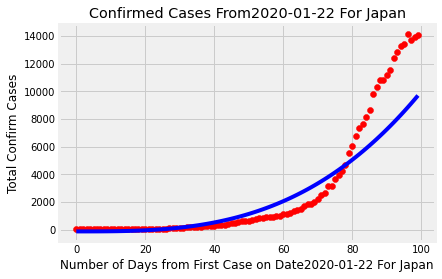

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


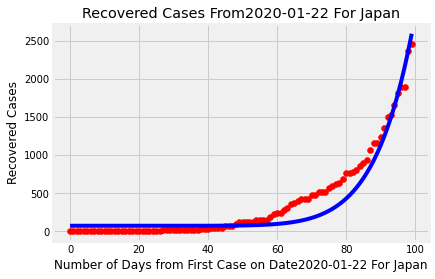

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


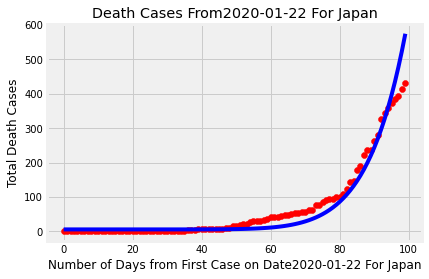

8245.250176951544


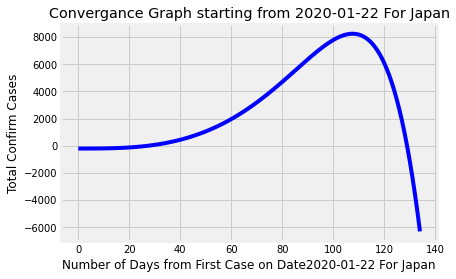

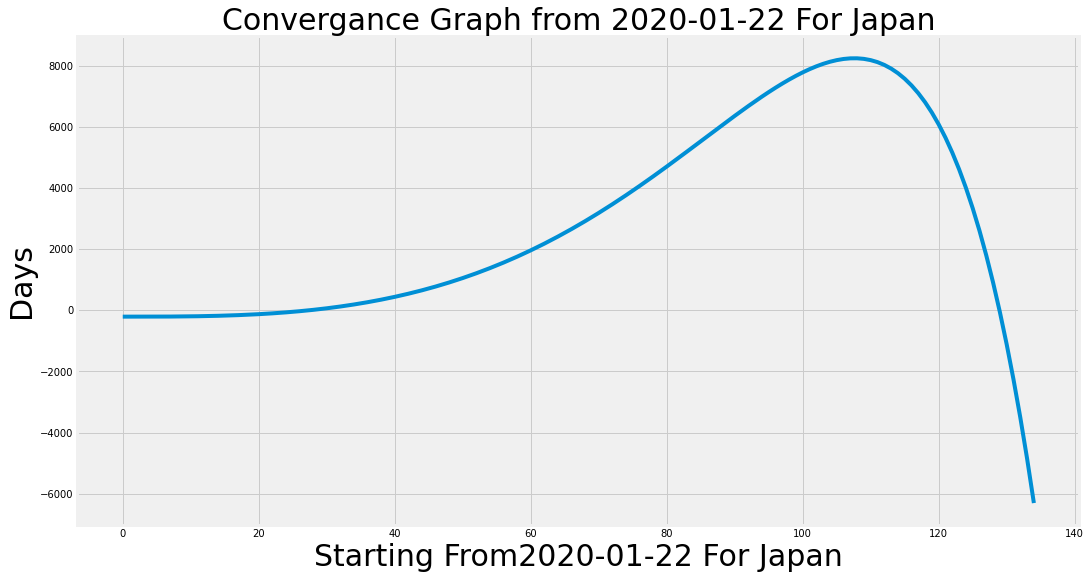

In [0]:
cdata = pd.read_csv("countries.csv")
pakistan = cdata[cdata['Country'] == 'Japan']



# coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])

input = 'Delhi'

# newdata1 = coviddata[coviddata['State/UnionTerritory'] == input]

input = 'Japan'
newdata1 = pakistan
recover = newdata1['Recovered']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']
date = np.array(newdata1['Date'])[0]+" For "+input
start_date = 'Number of Days from First Case on Date'+date

svr_rbf3 = SVR(kernel='poly', degree=3)

lw = 2

model_color = ['m', 'c', 'g']

y = pd.DataFrame(confirmed)

X = pd.DataFrame(range(len(confirmed)))


confirmed_model = svr_rbf3.fit(X, y)

plt.scatter(X, y, color = 'red')

t = pd.DataFrame(range(len(X)))

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, confirmed_model.predict(t), color = 'blue')
plt.title('Confirmed Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Total Confirm Cases')
plt.show()




X["data"] = confirmed_model.predict(X)

y = pd.DataFrame(recover)
svr_rbf3 = SVR(kernel='poly', degree=3)
recover_model = svr_rbf3.fit(X, y)

data = recover_model.predict(X)



t = pd.DataFrame(range(len(X)))

plt.scatter(t, y, color = 'red')

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, recover_model.predict(X), color = 'blue')
plt.title('Recovered Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Recovered Cases')
plt.show()









# coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])
# coviddata.tail(10)

# newdata1 = coviddata[coviddata['State/UnionTerritory'] == 'Delhi']
newdata1 = pakistan
recover = newdata1['Recovered']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']
date = np.array(newdata1['Date'])[0]+" For "+input
start_date = 'Number of Days from First Case on Date'+date

svr_rbf3 = SVR(kernel='poly', degree=3)

lw = 2

model_color = ['m', 'c', 'g']
y = pd.DataFrame(confirmed)

X1 = pd.DataFrame(range(len(confirmed)))


confirmed_model = svr_rbf3.fit(X1, y)


X1["data"] = confirmed_model.predict(X1)

y = pd.DataFrame(death)

svr_rbf3 = SVR(kernel='poly', degree=3)

death_model = svr_rbf3.fit(X1, y)

data = death_model.predict(X1)



t = pd.DataFrame(range(len(X1)))

plt.scatter(t, y, color = 'red')

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, death_model.predict(X1), color = 'blue')
plt.title('Death Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Total Death Cases')
plt.show()



X11 = pd.DataFrame(range(len(confirmed) + 35))

y = confirmed_model.predict(X11)

X11["data"] = y

yy = recover_model.predict(X11)

# print(X11)

X22 = pd.DataFrame(range(len(confirmed) + 35))

X22["data"] = y

yyy = death_model.predict(X11)


# print(y)

# print(yy)

# print(yyy)

d = []

(y - (yy - yyy))

  
  
data = (y - (yy - yyy))

print(max(data))

t = pd.DataFrame(range(len(y)))

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, data, color = 'blue')
plt.title('Convergance Graph starting from '+date)
plt.xlabel(start_date)
plt.ylabel('Total Confirm Cases')
plt.show()



plt.figure(figsize=(16, 9))
plt.plot(t, data)
plt.title('Convergance Graph from '+date, size=30)
plt.xlabel('Starting From'+date , size=30)
plt.ylabel('Days', size=30)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [0]:
coviddata = pd.read_csv("countries.csv")
japan = cdata[cdata['Country'] == 'Pakistan']
coviddata.head()
japan.tail(10)

,Date,Country,Confirmed,Recovered,Deaths
16959,2020-04-21,Pakistan,9565,2073,201
17146,2020-04-22,Pakistan,10076,2156,212
17333,2020-04-23,Pakistan,11155,2527,237
17520,2020-04-24,Pakistan,11940,2755,253
17707,2020-04-25,Pakistan,12723,2866,269
17894,2020-04-26,Pakistan,13328,2936,281
18081,2020-04-27,Pakistan,13915,3029,292
18268,2020-04-28,Pakistan,14612,3233,312
18455,2020-04-29,Pakistan,15525,3425,343
18642,2020-04-30,Pakistan,16817,4315,385


In [0]:
input = 'Pakistan'

newdata1 = japan
recover = newdata1['Recovered']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']
date = np.array(newdata1['Date'])[0]+" For "+input
start_date = 'Number of Days from First Case on Date'+date


In [0]:
dat1 = [] 
recover = np.array(recover)
for i in range(1,len(recover)) :
  dat1.append(recover[i] - recover[i - 1])

dat2 = [] 
death = np.array(death)
for i in range(1,len(death)) :
  dat2.append(death[i] - death[i - 1])

dat3 = [] 
confirmed = np.array(confirmed)
for i in range(1,len(confirmed)) :
  dat3.append(confirmed[i] - confirmed[i - 1])


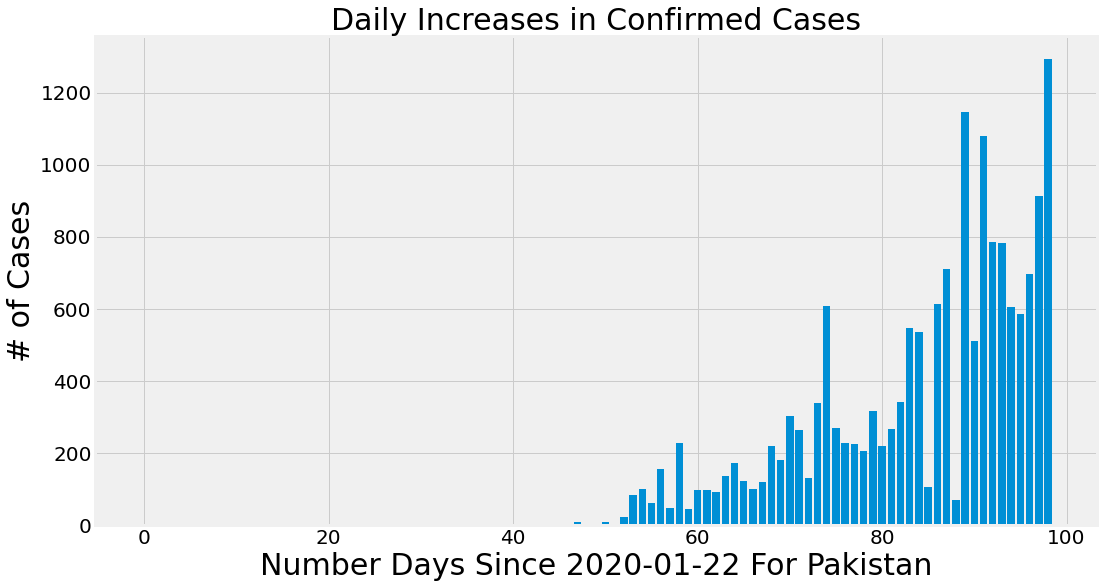

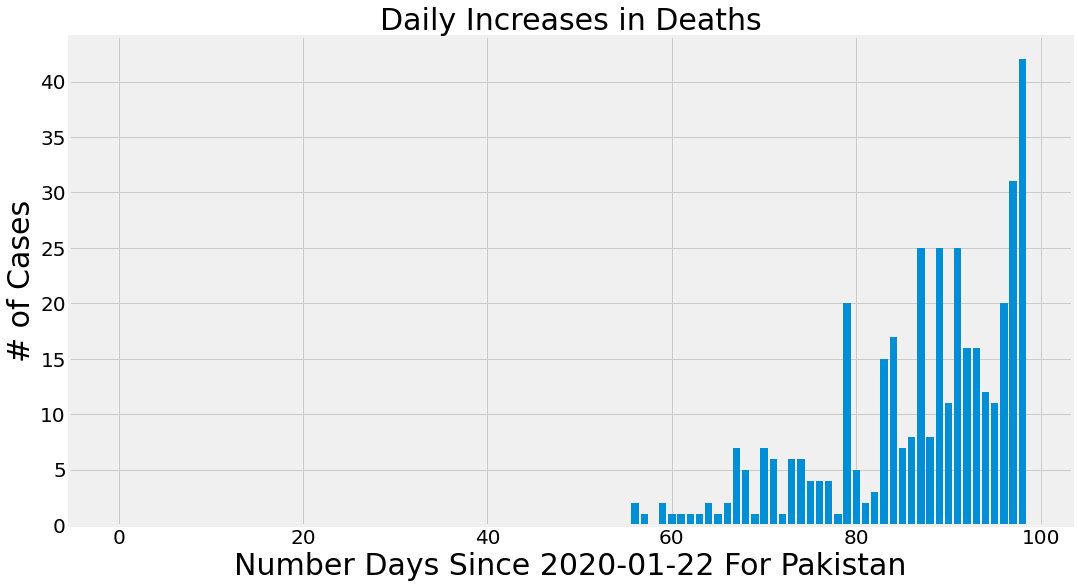

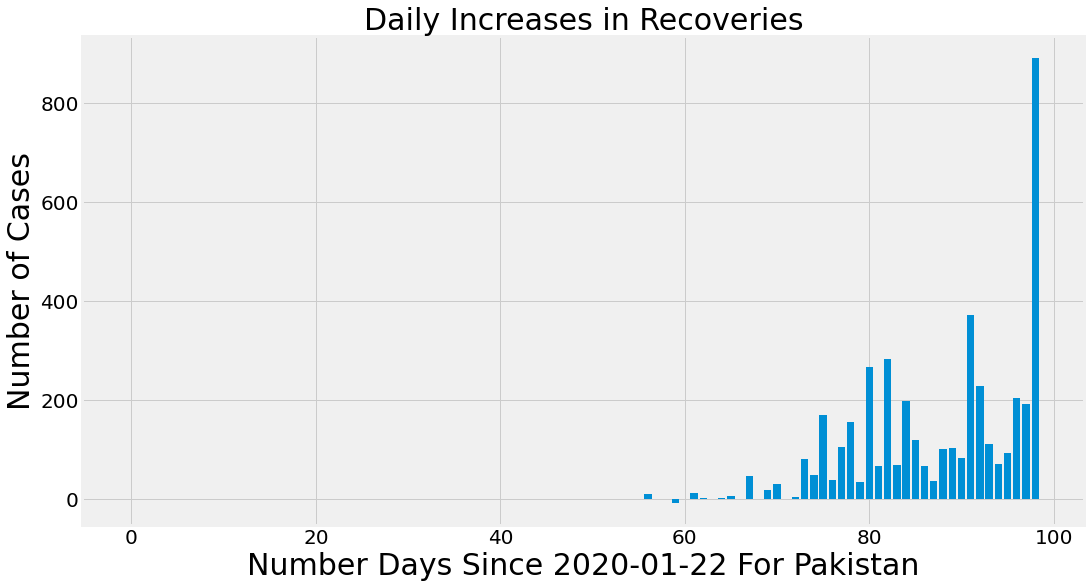

In [0]:
    plt.figure(figsize=(16, 9))
    plt.bar(range(len(dat3)), dat3)
    plt.title('Daily Increases in Confirmed Cases', size=30)
    plt.xlabel('Number Days Since '+date, size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(range(len(dat2)), dat2)
    plt.title('Daily Increases in Deaths', size=30)
    plt.xlabel('Number Days Since '+date, size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(range(len(dat1)), dat1)
    plt.title('Daily Increases in Recoveries', size=30)
    plt.xlabel('Number Days Since '+date, size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [0]:
input = 'China'
dl = coviddata[coviddata['Country'] == input]
# print(coviddata.tail(20))

dl_Confirmed = dl['Confirmed']

dl_size = len(dl)

input = 'India'

kl = coviddata[coviddata['Country'] == input]

kl_Confirmed = kl['Confirmed']

kl_size = len(kl)

input = 'Japan'

mh = coviddata[coviddata['Country'] == input]

mh_Confirmed = mh['Confirmed']

mh_size = len(mh)

input = 'Pakistan'

mp = coviddata[coviddata['Country'] == input]

mp_Confirmed = mp['Confirmed']

mp_size = len(mp)


list1 = [dl_size, kl_size, mh_size, mp_size]
list2 = [dl_Confirmed, kl_Confirmed, mh_Confirmed, mp_Confirmed]

m = max(list1)
print(m)
datas = range(m)


for i in range(len(list1)):
  list2[i] = np.hstack((np.zeros(m - len(list2[i])), list2[i]))
  print(list2[i])



100
[  548.   643.   920.  1406.  2075.  2877.  5509.  6087.  8141.  9802.
 11891. 16630. 19716. 23707. 27440. 30587. 34110. 36814. 39829. 42354.
 44386. 44759. 59895. 66358. 68413. 70513. 72434. 74211. 74619. 75077.
 75550. 77001. 77022. 77241. 77754. 78166. 78600. 78928. 79356. 79932.
 80136. 80261. 80386. 80537. 80690. 80770. 80823. 80860. 80887. 80921.
 80932. 80945. 80977. 81003. 81033. 81058. 81102. 81156. 81250. 81305.
 81435. 81498. 81591. 81661. 81782. 81897. 81999. 82122. 82198. 82279.
 82361. 82432. 82511. 82543. 82602. 82665. 82718. 82809. 82883. 82941.
 83014. 83134. 83213. 83306. 83356. 83403. 83760. 83787. 83805. 83817.
 83853. 83868. 83884. 83899. 83909. 83912. 83918. 83940. 83944. 83956.]
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 2.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 3.0000e+00 3.000

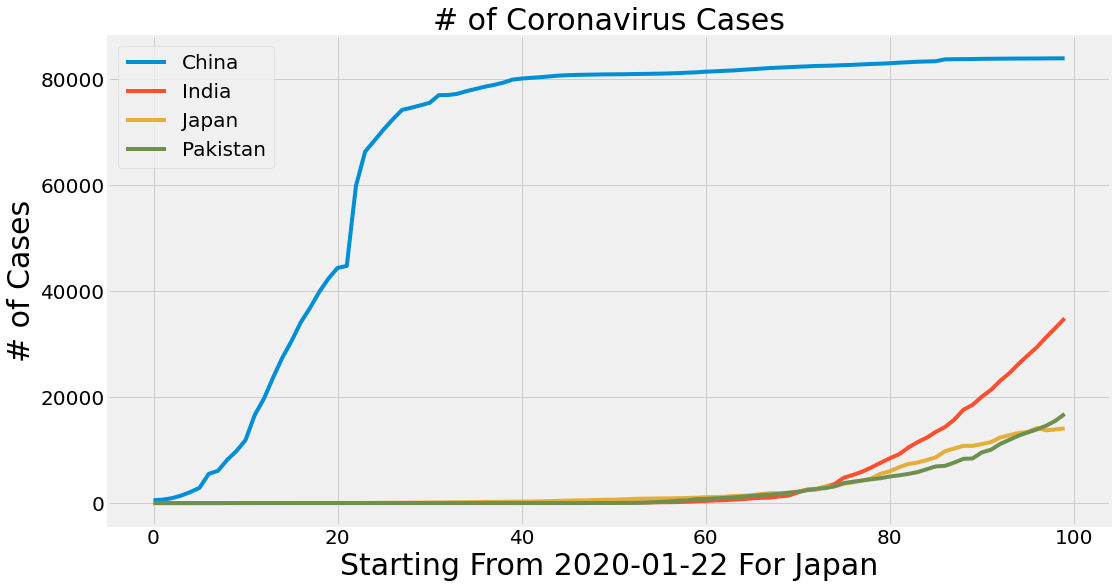

In [0]:
plt.figure(figsize=(16, 9))
plt.plot(datas, list2[0])
plt.plot(datas, list2[1])
plt.plot(datas, list2[2])
plt.plot(datas, list2[3])
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Starting From '+date, size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'India', 'Japan', 'Pakistan'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()